<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [21]:
# Filter for movies only
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()

# Clean duration column (e.g., "123 min" -> 123)
movies_df['duration'] = movies_df['duration'].astype(str).str.extract('(\d+)').astype(float)


In [22]:
# Assign base drop-off risk by duration
def assign_risk(duration):
    if duration < 90:
        return 'Low'
    elif duration <= 120:
        return 'Moderate'
    else:
        return 'High'

movies_df['dropoff_risk'] = movies_df['duration'].apply(assign_risk)


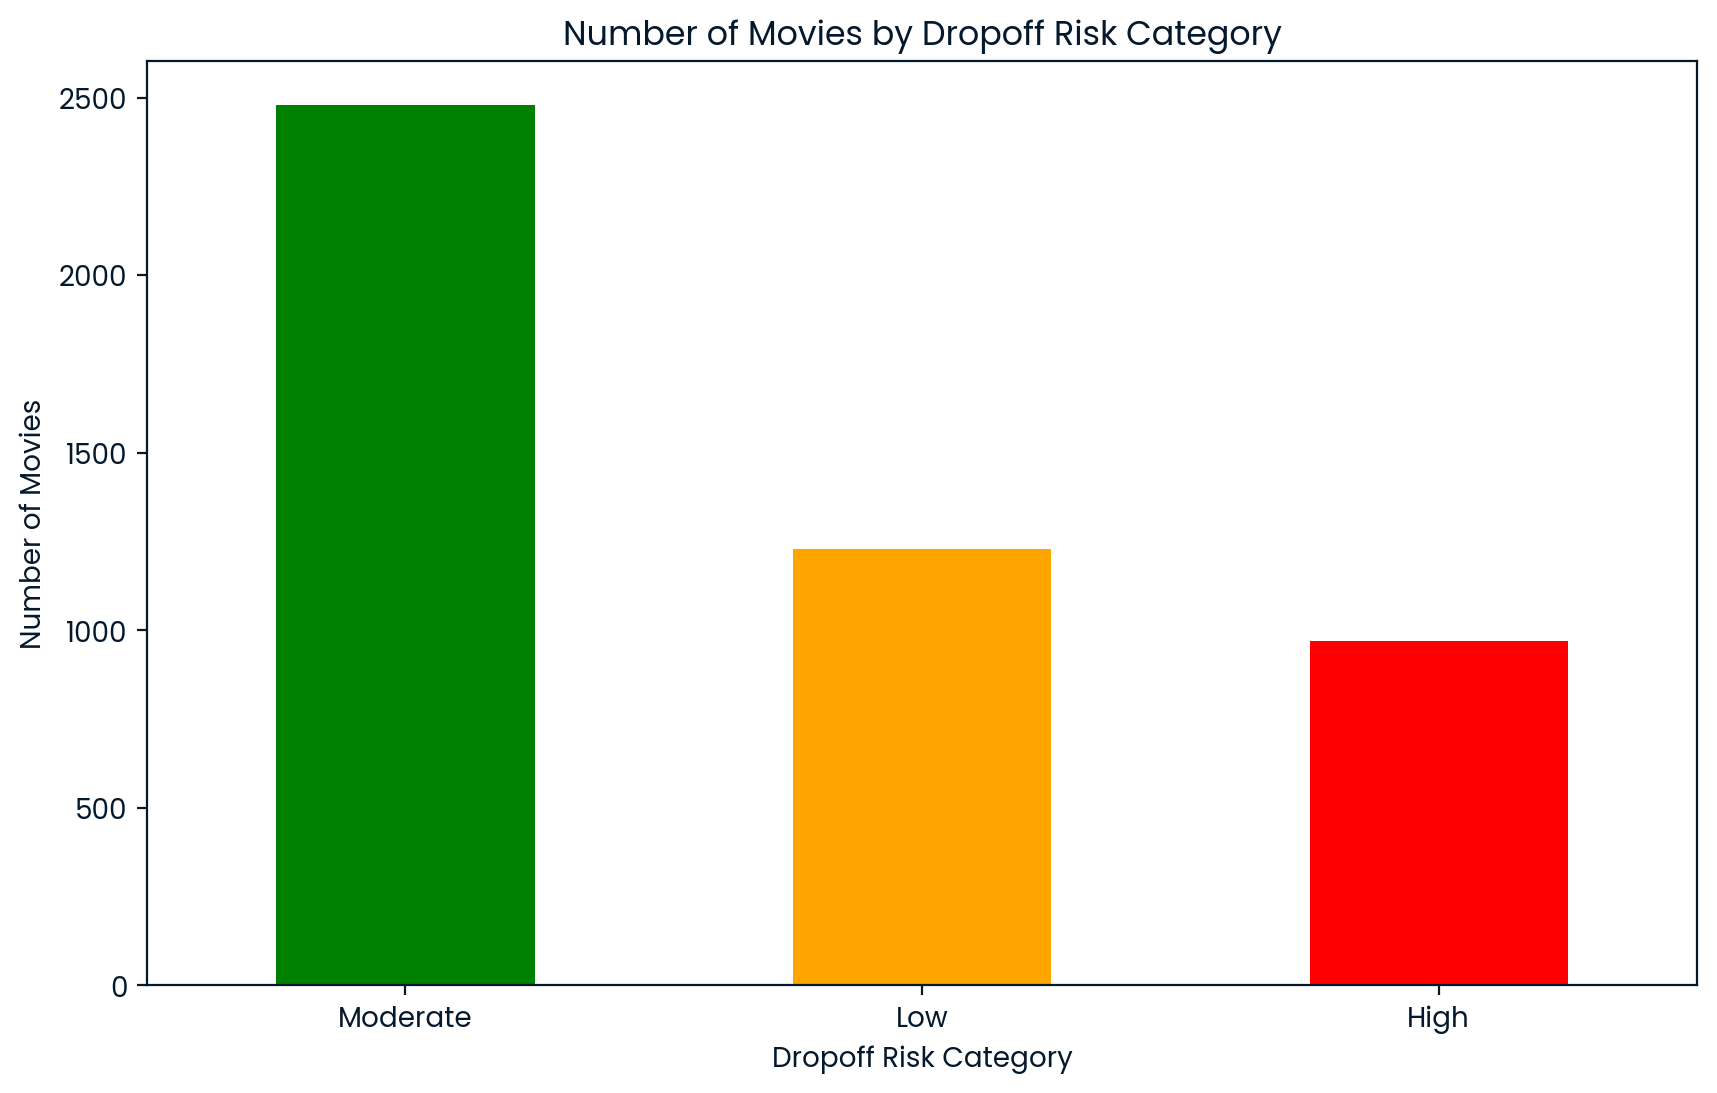

In [25]:
# Create bar charts for the number of movies in each dropoff risk category

# Count the number of movies in each dropoff risk category
risk_counts = movies_df['dropoff_risk'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
risk_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Number of Movies by Dropoff Risk Category')
plt.xlabel('Dropoff Risk Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()

In [3]:
import pandas as pd

# Load the CSV file
movies_df = pd.read_csv('netflix_data.csv')  # Adjust path if needed

# Create the genre risk weight mapping
genre_risk_weight = {
    'Documentaries': 1.3,
    'Dramas': 1.2,
    'Comedies': 1.0,
    'Action': 0.8,
    'Horror Movies': 0.7
}

# Apply the risk weight mapping
movies_df['risk_weight'] = movies_df['genre'].map(genre_risk_weight).fillna(1.0)

# Display a preview
print(movies_df[['genre', 'risk_weight']].head())


              genre  risk_weight
0            Dramas          1.2
1     Horror Movies          0.7
2            Action          0.8
3            Dramas          1.2
4  International TV          1.0


In [5]:
# Filter only movies
movies_only_df = movies_df[movies_df['type'] == 'Movie'].copy()

# Extract numeric value from duration (e.g., "123 min")
movies_only_df['duration'] = movies_only_df['duration'].astype(str).str.extract('(\d+)').astype(float)


In [6]:
# Define risk levels based on duration
def assign_risk(duration):
    if pd.isnull(duration):
        return 'Unknown'
    elif duration < 90:
        return 'Low'
    elif duration <= 120:
        return 'Moderate'
    else:
        return 'High'

movies_only_df['dropoff_risk'] = movies_only_df['duration'].apply(assign_risk)


In [7]:
# Map base risk to numeric scores
risk_score_map = {'Low': 1, 'Moderate': 2, 'High': 3, 'Unknown': 0}
movies_only_df['base_risk_score'] = movies_only_df['dropoff_risk'].map(risk_score_map)

# Final drop-off score = base score * genre weight
movies_only_df['final_dropoff_score'] = movies_only_df['base_risk_score'] * movies_only_df['risk_weight']

# Preview
print(movies_only_df[['title', 'genre', 'duration', 'dropoff_risk', 'risk_weight', 'final_dropoff_score']].head())


   title          genre  ...  risk_weight final_dropoff_score
0   7:19         Dramas  ...          1.2                 2.4
1  23:59  Horror Movies  ...          0.7                 0.7
2      9         Action  ...          0.8                 0.8
3     21         Dramas  ...          1.2                 3.6
5    122  Horror Movies  ...          0.7                 1.4

[5 rows x 6 columns]


In [11]:
# 1. Map base risk to numeric scores
risk_score_map = {'Low': 1, 'Moderate': 2, 'High': 3, 'Unknown': 0}
movies_only_df['base_risk_score'] = movies_only_df['dropoff_risk'].map(risk_score_map)

# 2. Final drop-off score = base score * genre risk weight
movies_only_df['final_dropoff_score'] = movies_only_df['base_risk_score'] * movies_only_df['risk_weight']

# 3. Preview the calculated scores
print(movies_only_df[['title', 'genre', 'duration', 'dropoff_risk', 'risk_weight', 'final_dropoff_score']].head())


   title          genre  ...  risk_weight final_dropoff_score
0   7:19         Dramas  ...          1.2                 2.4
1  23:59  Horror Movies  ...          0.7                 0.7
2      9         Action  ...          0.8                 0.8
3     21         Dramas  ...          1.2                 3.6
5    122  Horror Movies  ...          0.7                 1.4

[5 rows x 6 columns]


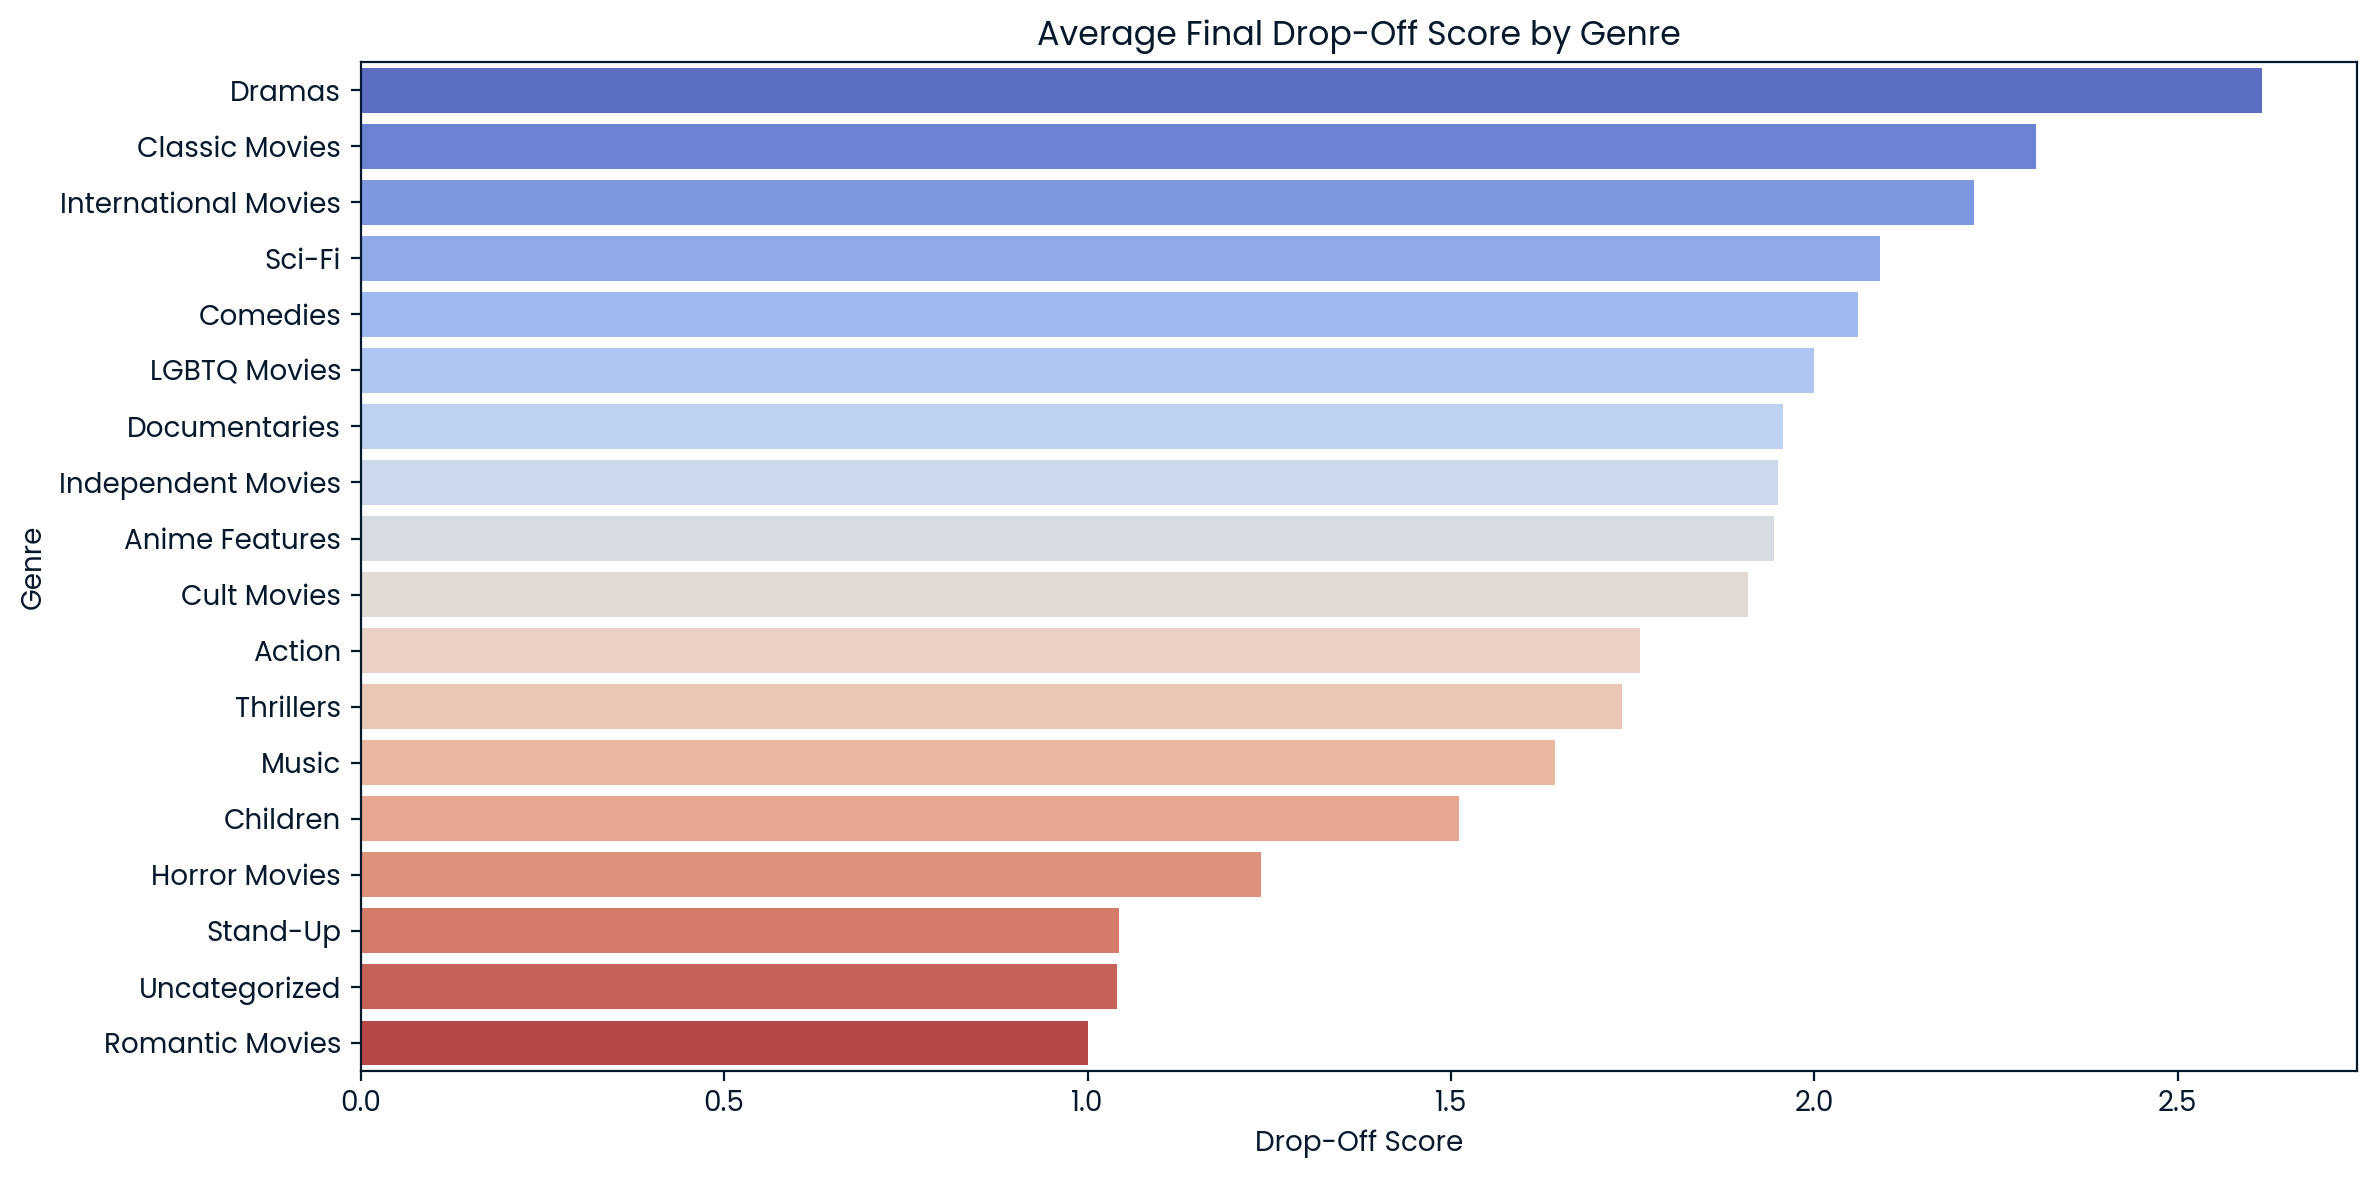

In [14]:
# 4. Group by genre and plot average final drop-off score
avg_risk = movies_only_df.groupby('genre')['final_dropoff_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_risk.values, y=avg_risk.index, palette="coolwarm")
plt.title('Average Final Drop-Off Score by Genre')
plt.xlabel('Drop-Off Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


📊 Drop-Off Risk Analysis by Genre

This bar chart visualizes the average viewer drop-off risk for each genre, calculated using a combination of duration and a custom genre engagement weight.

🎭 Dramas, Classic Movies, and International Movies show the highest drop-off scores. These may be longer, slower-paced, or require more focus.

😂 Romantic Movies, Stand-Up, and Horror are more engaging or shorter, with lower average drop-off risk.

Genres in the mid-range (e.g., Action, Thrillers) balance length with viewer interest, making them great picks for broader audiences.

✅ This analysis helps content teams curate binge-worthy lists or flag genres where editing or pacing improvements could improve engagement.

In [15]:
##prediction of drop off 
# Categorize drop-off score into target classes
def categorize_risk(score):
    if score < 1.5:
        return 'Low'
    elif score <= 2.5:
        return 'Moderate'
    else:
        return 'High'

movies_only_df['dropoff_label'] = movies_only_df['final_dropoff_score'].apply(categorize_risk)


In [16]:
#Select Features and Encode Them
from sklearn.preprocessing import LabelEncoder

# Copy the data
df_model = movies_only_df[['duration', 'genre', 'country', 'dropoff_label']].dropna()

# Encode categorical features
le_genre = LabelEncoder()
le_country = LabelEncoder()

df_model['genre_encoded'] = le_genre.fit_transform(df_model['genre'])
df_model['country_encoded'] = le_country.fit_transform(df_model['country'])

# Final feature set
X = df_model[['duration', 'genre_encoded', 'country_encoded']]
y = df_model['dropoff_label']


In [17]:
#rain a Model and Test Accuracy using random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       192
         Low       1.00      1.00      1.00       274
    Moderate       1.00      1.00      1.00       470

    accuracy                           1.00       936
   macro avg       1.00      1.00      1.00       936
weighted avg       1.00      1.00      1.00       936



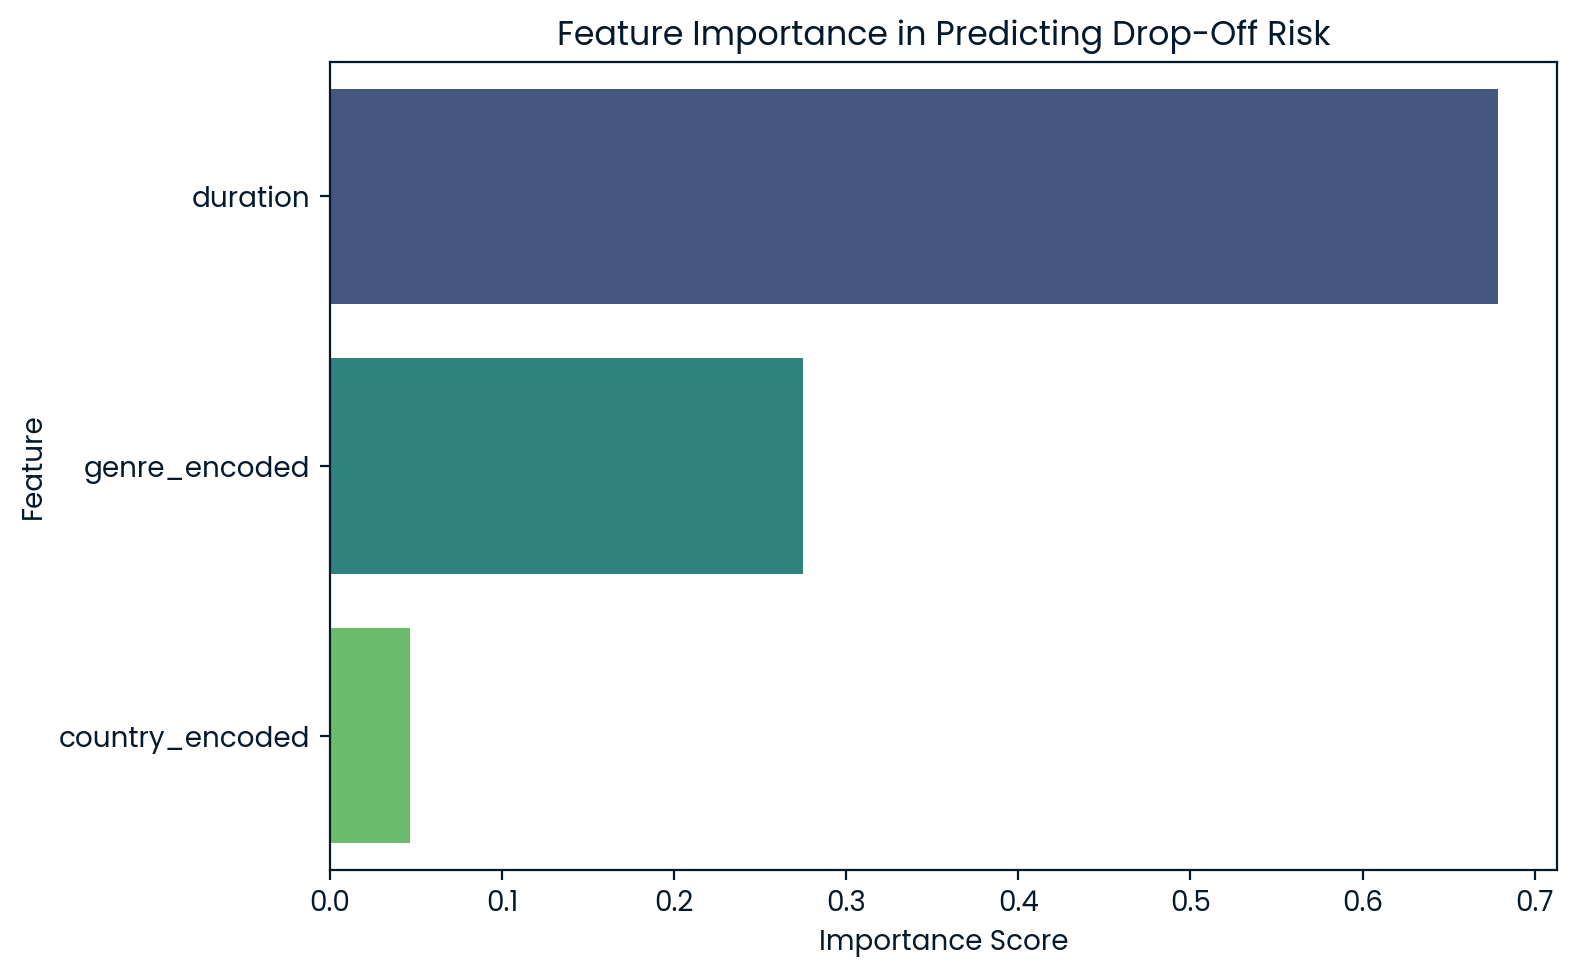

           Feature  Importance
0         duration    0.678890
1    genre_encoded    0.274595
2  country_encoded    0.046515


In [18]:
# Feature Importance (Random Forest)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract and organize feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Drop-Off Risk')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display table
print(importance_df)


### 🔍 Feature Importance Analysis

To understand which features most influence the model’s predictions of drop-off risk (Low, Moderate, High), we analyzed the feature importances from the trained `RandomForestClassifier`.

#### Key Findings:
- **Duration** is the most important predictor, contributing nearly **68\%** of the decision-making process.
- **Genre** plays a secondary but significant role, influencing around **27.5\%**.
- **Country** of production has minimal impact (~4.7\%), suggesting that attention span is more influenced by content type and length than geographical origin.

This insight validates our hypothesis that **longer movies** and **certain genres** are more likely to lead to viewer drop-off, aligning with user behavior patterns.

#### Visualization:
The bar chart above highlights the contribution of each feature to the model’s prediction:
- Longer bars indicate stronger influence.